In [125]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import math
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import normalize
from sklearn.neighbors import LocalOutlierFactor

In [126]:
# Task 0
data = pd.read_csv("iris_clusters.csv", delimiter=";")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   pl      300 non-null    float64
 1   pw      300 non-null    float64
 2   sl      300 non-null    float64
 3   sw      300 non-null    float64
 4   id      300 non-null    float64
dtypes: float64(5)
memory usage: 11.8 KB


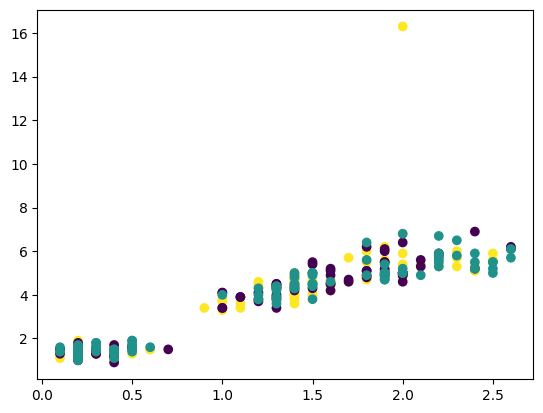

{0: 88, 1: 103, 2: 109}


In [127]:
# TASK 1: k-Means clustering

kmeans=KMeans(n_clusters=3) 
kmeans.fit(data)

# kmeans.labels_ 
# kmeans.cluster_centers_

plt.scatter(data["sw"], data["sl"], c=kmeans.labels_, cmap='viridis')
plt.show()

unique, counts =np.unique(kmeans.labels_, return_counts=True)

print(dict(zip(unique, counts)))

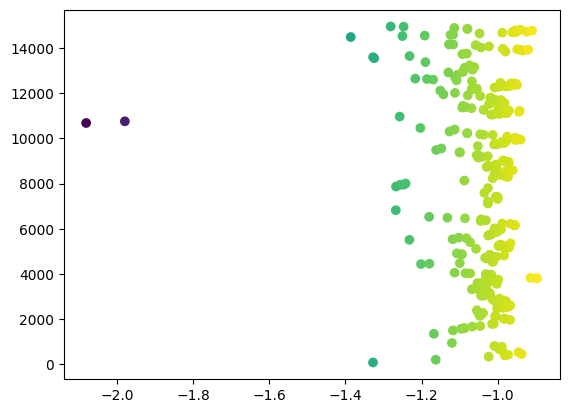

            pl        pw        sl        sw
min   0.082000  0.422222  0.055215  0.038462
max   1.000000  1.000000  1.000000  1.000000
mean  0.118228  0.670619  0.226191  0.470573


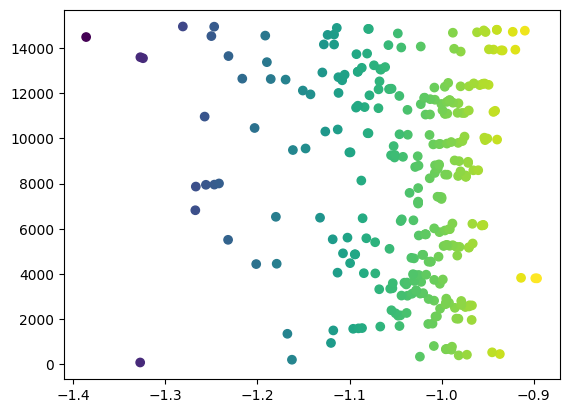

In [ ]:
# TASK 2: Preprocessing (outlier -> normalization)
preprocessedData1 = data.copy()

# Unsure about contamination factor? 
lof = LocalOutlierFactor(n_neighbors=10, contamination=0.5) 
lof.fit_predict(data)
# print(lof.negative_outlier_factor_)

preprocessedData1["negative_outlier_factor"] = lof.negative_outlier_factor_

plt.scatter(preprocessedData1["negative_outlier_factor"], preprocessedData1.id, c=preprocessedData1["negative_outlier_factor"], cmap='viridis')
plt.show()

preprocessedData1 = preprocessedData1[preprocessedData1["negative_outlier_factor"] > -1.5]

preprocessedData1[['pl', 'pw', 'sl', 'sw']] = normalize(preprocessedData1[['pl', 'pw', 'sl', 'sw']], norm='max', axis=0)


plt.scatter(preprocessedData1["negative_outlier_factor"], preprocessedData1.id, c=preprocessedData1["negative_outlier_factor"], cmap='viridis')
plt.show()

stats = preprocessedData1[['pl', 'pw', 'sl', 'sw']].agg(["min", "max", "mean"])
print(stats)

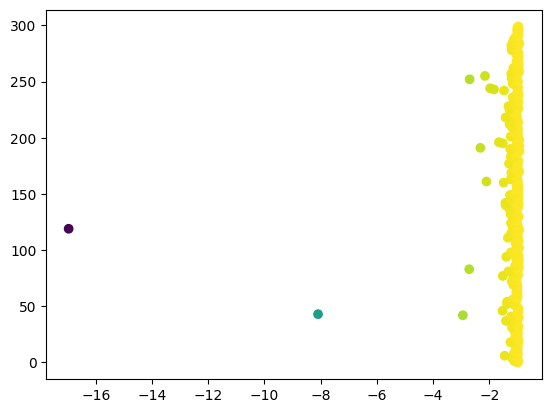

            pl        pw        sl        sw
min   0.082000  0.422222  0.055215  0.038462
max   0.156000  1.000000  0.423313  1.000000
mean  0.115141  0.670321  0.223988  0.470315


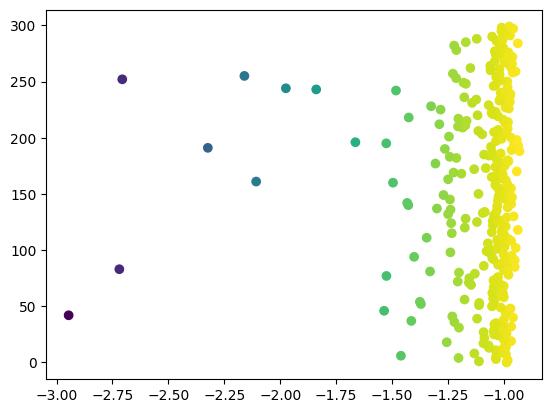

In [ ]:
# TASK 2: Preprocessing (normalization -> outlier)

preprocessedData2 = data.copy()

preprocessedData2[['pl', 'pw', 'sl', 'sw']] = normalize(preprocessedData2[['pl', 'pw', 'sl', 'sw']], norm='max', axis=0)

lof = LocalOutlierFactor(n_neighbors=10)
lof.fit_predict(preprocessedData2[['pl', 'pw', 'sl', 'sw']])

preprocessedData2["negative_outlier_factor"] = lof.negative_outlier_factor_ 

plt.scatter(preprocessedData2["negative_outlier_factor"], preprocessedData2.index, c=preprocessedData2["negative_outlier_factor"], cmap='viridis')
plt.show()

preprocessedData2 = preprocessedData2[preprocessedData2["negative_outlier_factor"] > -4]


plt.scatter(preprocessedData2["negative_outlier_factor"], preprocessedData2.index, c=preprocessedData2["negative_outlier_factor"], cmap='viridis')
plt.show()

stats = preprocessedData2[['pl', 'pw', 'sl', 'sw']].agg(["min", "max", "mean"])
print(stats)

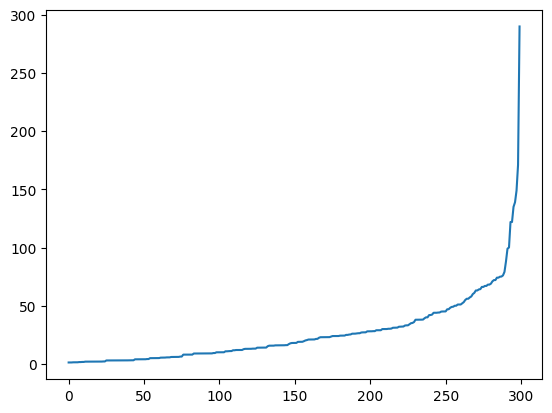

In [130]:
# Plot k-distances (given from assignment)
def k_distances2(X,n):
    neighbors = NearestNeighbors(n_neighbors=n)
    neighbors_fit = neighbors.fit(X)
    distances, indices = neighbors_fit.kneighbors(X)
    return distances, indices

# TODO: add your parameters here.
# data -- your normalized dataset
# k -- k-th neighbour. By default, k=count(features)+1
distances, indices = k_distances2(data,5)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)
plt.show()
